In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
reviews = pd.read_csv('dataset.csv')
reviews.head()

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,0
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,1
4,OOPS. I typed her name incorrectly (todayâ€™s ...,en,litigious


In [3]:
reviews['Label'] = np.where(reviews['Label'] == 'positive', 1, 0)

In [4]:
sentences = reviews['Text'].to_numpy()
labels = reviews['Label'].to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25)
print("Training Data Input Shape: ", X_train.shape)
print("Training Data Output Shape: ", y_train.shape)
print("Testing Data Input Shape: ", X_test.shape)
print("Testing Data Output Shape: ", y_test.shape)

Training Data Input Shape:  (703390,)
Training Data Output Shape:  (703390,)
Testing Data Input Shape:  (234464,)
Testing Data Output Shape:  (234464,)


In [6]:
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [7]:
tokenizer.fit_on_texts(X_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  703390
Number of Words:  10000


In [8]:
tokenizer.word_counts

OrderedDict([('take', 15756),
             ('a', 352792),
             ('look', 10598),
             ('at', 64626),
             ('this', 116411),
             ('new', 20210),
             ('blog', 822),
             ('regarding', 797),
             ('the', 580271),
             ('physical', 1123),
             ('safeguards', 36),
             ('requirements', 296),
             ('under', 7564),
             ('hipaa', 89),
             ('security', 6320),
             ('rule', 2030),
             ('good', 44431),
             ('can', 47077),
             ('mean', 7115),
             ('difference', 1675),
             ('between', 5623),
             ('protecting', 558),
             ('patient', 910),
             ('information', 2648),
             ('and', 313219),
             ('high', 6181),
             ('costs', 1004),
             ('of', 254582),
             ('data', 6420),
             ('breach', 21506),
             ('https', 223809),
             ('t', 229783),
             ('c

In [9]:
tokenizer.word_docs

defaultdict(int,
            {'take': 15185,
             'https': 194968,
             'regarding': 784,
             'look': 10208,
             'blog': 791,
             'good': 42291,
             'data': 5518,
             'physical': 1081,
             'between': 5468,
             'breach': 20779,
             'mean': 6936,
             'high': 5822,
             'costs': 963,
             'the': 333645,
             'of': 192674,
             'can': 43353,
             'this': 102328,
             'patient': 842,
             'co': 196116,
             'awzlttgfci': 1,
             'safeguards': 35,
             'requirements': 289,
             'under': 7231,
             'protecting': 543,
             'hipaa': 74,
             'at': 59217,
             'and': 229247,
             't': 198784,
             'new': 18796,
             'a': 252167,
             'security': 5821,
             'medcurity': 1,
             'difference': 1652,
             'rule': 1932,
            

In [10]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])

[155, 4, 196, 32, 17, 121, 2007, 2066, 2, 1533, 1, 4531, 256, 2, 1, 309, 883, 48, 1533, 1, 45, 278, 2, 1051, 337, 2744, 1831, 669, 5, 2, 314, 1683, 6, 4, 304, 113, 11, 9, 10, 1, 1, 1]


In [11]:
sequence_length = 200
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [12]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [13]:

embedding_dim = 16
lstm_out = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))
model.add(Bidirectional(LSTM(lstm_out)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

In [15]:
history = model.fit(train_padded, y_train, epochs=2, validation_data=(test_padded, y_test), callbacks=callbacks)

Epoch 1/2
21981/21981 [==============================] - ETA: 0s - loss: 4.5908e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: C:\Users\Abdul Aziz\Desktop\SS\imdb_reviews_LSTM_sentiment_analysis\assets


INFO:tensorflow:Assets written to: C:\Users\Abdul Aziz\Desktop\SS\imdb_reviews_LSTM_sentiment_analysis\assets


21981/21981 [==============================] - 1895s 86ms/step - loss: 4.5908e-04 - accuracy: 1.0000 - val_loss: 1.4021e-10 - val_accuracy: 1.0000
Epoch 2/2
21981/21981 [==============================] - ETA: 0s - loss: 3.2642e-11 - accuracy: 1.0000

INFO:tensorflow:Assets written to: C:\Users\Abdul Aziz\Desktop\SS\imdb_reviews_LSTM_sentiment_analysis\assets


INFO:tensorflow:Assets written to: C:\Users\Abdul Aziz\Desktop\SS\imdb_reviews_LSTM_sentiment_analysis\assets


21981/21981 [==============================] - 1765s 80ms/step - loss: 3.2642e-11 - accuracy: 1.0000 - val_loss: 1.0002e-11 - val_accuracy: 1.0000


In [16]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

           loss  accuracy      val_loss  val_accuracy
0  4.590802e-04  0.999991  1.402149e-10           1.0
1  3.264236e-11  1.000000  1.000250e-11           1.0


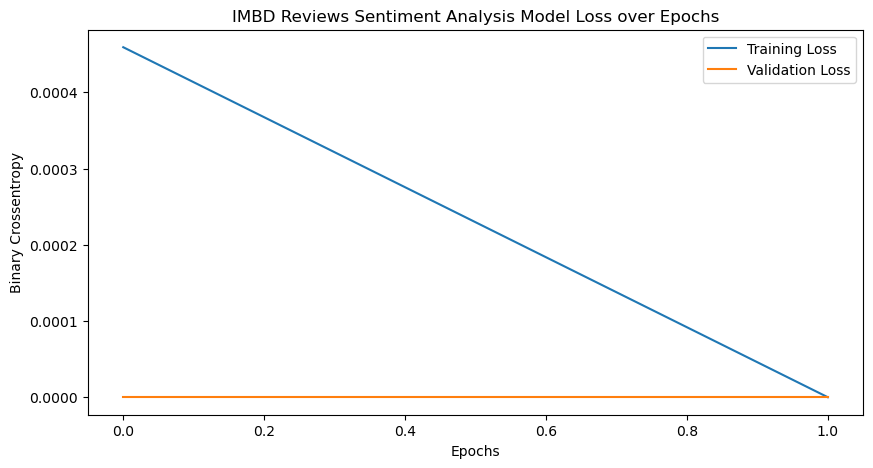

In [17]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('IMBD Reviews Sentiment Analysis Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

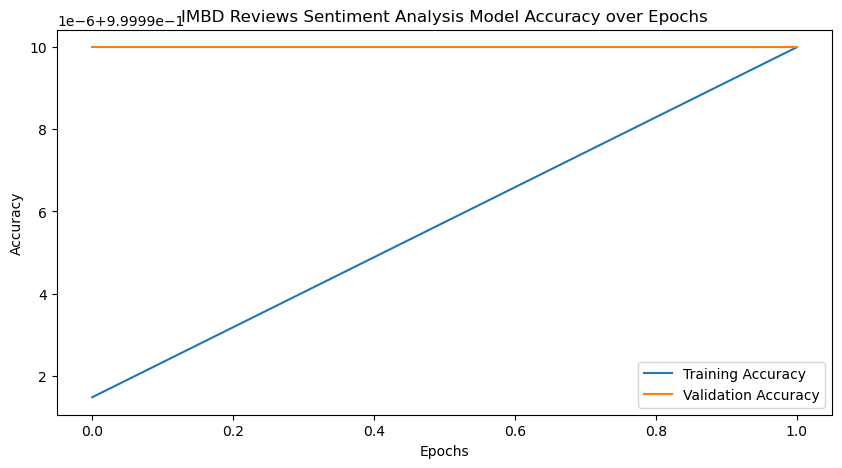

In [18]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title('IMBD Reviews Sentiment Analysis Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [2]:
a = ["you are bad "]
a = tokenizer.texts_to_sequences(a)
a = np.array(a)
# Preparing data to send to model and formating
# it according to model
a = pad_sequences(a, padding='post', maxlen=200)

a = a.reshape((a.shape[0], a.shape[1], 1))
print(a.shape)

prediction = model.predict(np.array(a))
print(prediction) 
type(prediction)

if prediction == [0]:
    print('NotHate')

if prediction == [1]:
    print('Hate')

NameError: name 'tokenizer' is not defined